# Remember add document about this code

### OOP+Data Structure (Queue, Stack and Tree)

### Stack data structure

In [2]:
class MyStack:
    def __init__(self, capacity):
        self.__capacity = capacity
        self.__stack = []

    def push(self, value):
        self.__stack.append(value)

    def print(self):
        print(self.__stack)

stack = MyStack(5)
stack.push(12)
stack.push(8)
stack.push(21)

stack.print()

[12, 8, 21]


In [10]:
class MyStack:
    def __init__(self, capacity=5):
        self.__capacity = capacity
        self.__stack = []

    def is_full(self):
        return len(self.__stack) == self.__capacity

    def push(self, value):
        if self.is_full():
            print("Stack is full so nothing happen!")
            return
        self.__stack.append(value)

    # I also see other call this function is `peek`
    def top(self):
        if self.is_empty():
            print("Stack is full so nothing happen!")
            return None
        return self.__stack[-1]

    def describe(self):
        print(self.__stack)

    def is_empty(self):
        return len(self.__stack) == 0

    def pop(self):
        if self.is_empty():
            print("The stack is empty so we cannot pop value!")
            return None
        return self.__stack.pop()
    def size(self):
        return len(self.__stack)


In [13]:
stack = MyStack(5)
print("Starting pushing!!!")
stack.push(12)
stack.push(8)
stack.push(21)
stack.push(33)
stack.push(34)
stack.push(35)
stack.describe()

# ...
print("\nStarting poping!!!")
stack.pop()
stack.pop()
stack.pop()
print("After 3 times poping the stack currently is: ")
stack.describe()

print("\nContinuing poping!!!")
stack.pop()
stack.pop()
stack.pop()
stack.pop()

print("\nAfter 4 times poping the stack currently is: ")
stack.describe()

Starting pushing!!!
Stack is full so nothing happen!
[12, 8, 21, 33, 34]

Starting poping!!!
After 3 times poping the stack currently is: 
[12, 8]

Continuing poping!!!
The stack is empty so we cannot pop value!
The stack is empty so we cannot pop value!

After 4 times poping the stack currently is: 
[]


In [21]:
# Example usage
stack = MyStack()

# Push elements
stack.push("Apple")
stack.push("Banana")
stack.push("Cherry")

# Peek at the top element
stack.top()  # Should be "Cherry"

# Pop elements
stack.pop()   # Removes "Cherry"
stack.pop()   # Removes "Banana"

# Peek again
stack.top()  # Should now be "Apple"

#Check size
print("Current size:", stack.size())

# Final pop
stack.pop()   # Removes "Apple"

#Is the stack empty now?
print("Is empty?", stack.is_empty())

Current size: 1
Is empty? True


### Explain for me more dfs_with_stack

In [22]:
### Explain for me more
def dfs_with_stack(tree, start_node):
    visited = set()
    stack = MyStack()
    stack.push(start_node)

    print("DFS Traversal: ")#

    while not stack.is_empty():
        node = stack.pop()
        if node not in visited:
            print(node)
            visited.add(node)
            # Add neighbors in reversed order for left to right traversal
            for neighbor in reversed(tree[node]):
                if neighbor not in visited:
                    stack.push(neighbor)

In [23]:
# Define the tree
Tree = {
    'A': ['B', 'C'],
    'B': ['D'],
    'C': ['E'],
    'D': [],
    'E': []
}

# Perform DFS
dfs_with_stack(Tree, 'A')

DFS Traversal: 
A
B
D
C
E


In [ ]:
# Tree class
class TreeNode:
    def __init__(self, data):
        self.data = data
        self.children = []
        self.parent = None

    def add_child(self, child):
        child.parent = self
        self.children.append(child)

    def get_level(self):
        level = 0
        p = self.parent
        while p:
            level += 1
            p = p.parent
        return level

    def print_tree(self):
        space = ' ' * self.get_level() * 3
        prefix = space + '|__' if self.parent else ''
        print(prefix + self.data) #add prefix
        if self.children:
            for child in self.children:
                child.print_tree()

In [25]:
def create_example_tree():
    a_node = TreeNode("A")
    b_node = TreeNode("B")
    c_node = TreeNode("C")
    d_node = TreeNode("D")
    e_node = TreeNode("E")
    f_node = TreeNode("F")
    g_node = TreeNode("G")

    a_node.add_child(b_node)
    a_node.add_child(c_node)

    b_node.add_child(d_node)
    b_node.add_child(e_node)

    c_node.add_child(f_node)
    c_node.add_child(g_node)
    return a_node

tree = create_example_tree()
tree.print_tree()

A
   |__B
      |__D
      |__E
   |__C
      |__F
      |__G


In [ ]:
pip install graphviz
# Then run sudo apt-get install graphviz
# Fix FileNotFoundError: [Errno 2] No such file or directory: 'xdg-open'
# sudo apt-get install --reinstall xdg-utils

Note: you may need to restart the kernel to use updated packages.


In [4]:
from graphviz import Graph

class TreeNode:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key

def add_edges(dot, node):
    if node is None:
        return
    if node.left:
        dot.edge(str(node.val), str(node.left.val))
        add_edges(dot, node.left)
    if node.right:
        dot.edge(str(node.val), str(node.right.val))
        add_edges(dot, node.right)

def draw_tree(root):
    dot = Graph()
    dot.node(str(root.val))
    add_edges(dot, root)
    return dot

# Driver code
if __name__ == '__main__':
    # Create the root of the tree
    root = TreeNode(1)
    root.left = TreeNode(2)
    root.right = TreeNode(3)
    root.left.left = TreeNode(4)
    root.left.right = TreeNode(5)

    dot = draw_tree(root)
    dot.render('orignial_tree', format='png', view=True)

/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'orignial_tree.png'


In [11]:
from collections import deque

def bfs(root):
    if root is None:
        return []

    result = []
    queue = deque([root])

    while queue:
        node = queue.popleft()
        result.append(node.val)

        if node.left:
            queue.append(node.left)
        if node.right:
            queue.append(node.right)

        return result

root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
root.right.left = TreeNode(6)
root.right.right = TreeNode(7)

print("Original tree:")
dot = draw_tree(root)
dot.render('original_tree_bfs', format='png', view=True)

# Perform BFS
bfs_result = bfs(root)
print("BFS traversal result:", bfs_result)

Original tree:
BFS traversal result: [1]


/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'original_tree_bfs.png'


In [12]:
class BinaryTree:
    def __init__(self, root=None):
        self.root = root

    def dfs(self):
        if not self.root:
            print("Tree is empty.")
            return

        stack = MyStack()
        stack.push(self.root)

        print("DFS Traversal (Pre-order):")
        while not stack.is_empty():
            current = stack.pop()
            print("visited", current.val)
            # Push right first so left is processed first
            if current.right:
                stack.push(current.right)
            if current.left:
                stack.push(current.left)

# Create binary tree nodes
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
root.right.left = TreeNode(6)
root.right.right = TreeNode(7)

# Create the tree and perform DFS
binary_tree = BinaryTree(root)
binary_tree.dfs()

DFS Traversal (Pre-order):
visited 1
visited 2
visited 4
visited 5
visited 3
visited 6
visited 7


In [ ]:
from graphviz import Graph

class TreeNode:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key

def insert_node(root, key):
    # Create a new node
    new_node = TreeNode(key)
    # If the tree is empty, the new node becomes the root
    if root is None:
        return new_node
    # Use a queue to perform level-order traversal
    queue = []
    queue.append(root)
    # Traverse the tree
    while queue:
        # Dequeue a node
        temp = queue.pop(0)
        # Check if the left child is empty
        if temp.left is None:
            temp.left == new_node
            return root
        else:
            queue.append(temp.left)

        # Check if the right child is empty
        if temp.right is None:
            temp.right = new_node
            return root
        else:
            queue.append(temp.right)
    return root

def add_edges(dot, node):
    if node is None:
        return

    if node.left:
        dot.edge(str(node.val), str(node.left.val))
        add_edges(dot, node.left)
    if node.right:
        dot.edge(str(node.val), str(node.right.val))
        add_edges(dot, node.right)

def draw_tree(root):
    dot = Graph()
    dot.node(str(root.val))
    add_edges(dot, root)
    return dot

# Driver code
if __name__ == '__main__':
    # Create the root of the tree
    root = TreeNode(1)
    root.left = TreeNode(2)
    root.right = TreeNode(3)
    root.left.left = TreeNode(4)
    root.left.right = TreeNode(5)

    dot = draw_tree(root)
    dot.render('orignial_tree', format='png', view=True)

    key = 6
    print(f"\nInserting {key} into the binary tree.")
    root = insert_node(root, key)

    dot = draw_tree(root)
    dot.render('after_tree', format='png', view=True)



Inserting 6 into the binary tree.


/usr/bin/xdg-open: 882: /usr/bin/xdg-open: 882: www-browser: not found
www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'after_tree.png'
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'orignial_tree.png'


### Queue data structure

In [15]:
class MyQueue:
    def __init__(self, capacity):
        self.__capacity = capacity
        self.__queue = []

    def is_full(self):
        return len(self.__queue) == self.__capacity

    def enqueue(self, value):
        if self.is_full():
            print('The queue is full so we cannot enqueue more items!')
            return None
        return self.__queue.append(value)

    def describe(self):
        print(self.__queue)

    def is_empty(self):
        return len(self.__queue) == 0

    def dequeue(self):
        if self.is_empty():
            print('The queue is empty so we cannot dequeue anymore!')
            return None
        return self.__queue.pop(0)


queue = MyQueue(5)
queue.describe()
print("Starting pushing!!!")
queue.enqueue(9)
queue.enqueue(5)
queue.enqueue(2)
queue.enqueue(1)
queue.enqueue(0)
queue.enqueue(6)
queue.describe()

print("\nStarting dequeuing!!!")
queue.dequeue()
queue.dequeue()
queue.dequeue()
queue.describe()

queue.dequeue()
queue.dequeue()
queue.dequeue()
queue.dequeue()
queue.describe()

[]
Starting pushing!!!
The queue is full so we cannot enqueue more items!
[9, 5, 2, 1, 0]

Starting dequeuing!!!
[1, 0]
The queue is empty so we cannot dequeue anymore!
The queue is empty so we cannot dequeue anymore!
[]


In [ ]:
#TBU
from collections import deque

def delete_node(root, key):
    if root is None:
        return None

    if root.left is None and root.right is None:
        if root.val == key:
            return None
        else:
            return root

    key_node = None
    queue = deque([root])

    while queue:
        node = queue.popleft()

        if node.val == key:
            key_node = node

        if node.left:
            queue.append(node.left)

        if node.right:
            queue.append(node.right)

    if key_node:
        deepest_node = node
        key_node.val = deepest_node.val
        delete_deepest(root, deepest_node)

    return root

def delete_deepest(root, d_node):
    queue = deque([root])
    while queue:
        node = queue.popleft()

        if node is d_node:
            node = None
            return

        if node.right:
            if node.right is d_node:
                node.right = None
                return
            else:
                queue.append(node.right)

        if node.left:
            if node.left is d_node:
                node.left = None
                return
            else:
                queue.append(node.left)

if __name__ == '__main__':
    # Create the root of the tree
    root = TreeNode(1)
    root.left = TreeNode(2)
    root.right = TreeNode(3)
    root.left.left = TreeNode(4)
    root.left.right = TreeNode(5)
    root.right.left = TreeNode(6)
    root.right.right = TreeNode(7)

    dot = draw_tree(root)
    dot.render('original_delete_tree', format='png', view=True)

    key = 2
    print(f"\nDeleting node with key {key}")
    root = delete_node(root, key)
    dot = draw_tree(root)
    dot.render('after_delete_tree', format='png', view=True)






Deleting node with key 2


/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'original_delete_tree.png'
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'after_delete_tree.png'


BST

In [15]:
#TBD
class BST:
    def __init__(self):
        self.root = None

    def insert(self, key):
        if self.root is None:
            self.root = TreeNode(key)
        else:
            self._insert(self.root, key)

    def _insert(self, node, key):
        if key < node.val:
            if node.left is None:
                node.left = TreeNode(key)
            else:
                self._insert(node.left, key)
        else:
            if node.right is None:
                node.right = TreeNode(key)
            else:
                self._insert(node.right, key)

    def search(self, key):
        return self._search(self.root, key)

    def _search(self, node, key):
        if node is None or node.val == key:
            return node

        if key < node.val:
            return self._search(node.left, key)

        return self._search(node.right, key)



In [16]:
if __name__ == '__main__':
    bst = BST()

    # Insert elements
    elements = [50, 30, 20, 40, 70, 60, 80]
    for element in elements:
        bst.insert(element)


     # Visualize the BST
    dot = draw_tree(bst.root)
    dot.render('bst', format='png', view=True)

    # Search for elements
    key = 40
    result = bst.search(key)
    if result:
        print(f"Element {key} found in the BST")
    else:
        print(f"Element {key} not found in the BST")


Element 40 found in the BST


/usr/bin/xdg-open: 882: www-browser: not found
/usr/bin/xdg-open: 882: links2: not found
/usr/bin/xdg-open: 882: elinks: not found
/usr/bin/xdg-open: 882: links: not found
/usr/bin/xdg-open: 882: lynx: not found
/usr/bin/xdg-open: 882: w3m: not found
xdg-open: no method available for opening 'bst.png'


### Queue Stack Tree

In [ ]:
Tree = {
    'A': ['B', 'C'],
    'B': ['D'],
    'C': ['E'],
    'D': [],
    'E': []
}

### Binary Tree

In [17]:
class BinaryTreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

In [20]:
class BinaryTree:
    def __init__(self, root=None):
        self.root = root

    def dfs(self):
        if not self.root:
            print("Tree is empty.")
            return

        visited = set()
        stack = MyStack()
        stack.push(self.root)

        print("DFS Traversal (Pre-order):")

        while not stack.is_empty():
            current = stack.pop()
            if current.value not in visited:
                print(current.value)
                visited.add(current.value)

                # Push right first so left is processed first
                if current.right:
                    stack.push(current.right)
                if current.left:
                    stack.push(current.left)


In [21]:
# Create binary tree nodes
A = BinaryTreeNode('A')
B = BinaryTreeNode('B')
C = BinaryTreeNode('C')
D = BinaryTreeNode('D')
E = BinaryTreeNode('E')

# Link the nodes
A.left = B
A.right = C
B.left = D
C.right = E

# Create the tree and perform DFS
binary_tree = BinaryTree(A)
binary_tree.dfs()


DFS Traversal (Pre-order):
A
B
D
C
E


Labeled Image:
 [[1 1 0 0 0]
 [1 1 0 2 2]
 [0 0 0 2 2]
 [0 3 0 0 0]
 [3 3 3 0 0]]


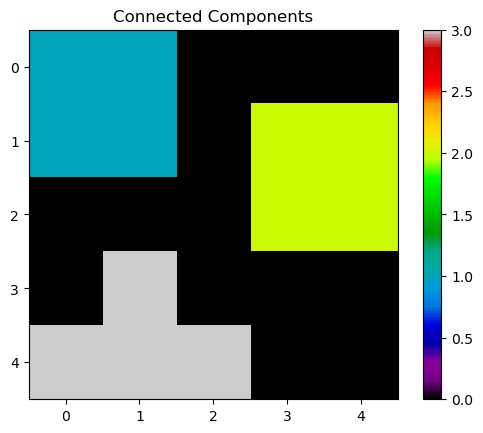

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Sample binary image (1 = object pixel, 0 = background)
binary_image = np.array([
    [1, 1, 0, 0, 0],
    [1, 1, 0, 1, 1],
    [0, 0, 0, 1, 1],
    [0, 1, 0, 0, 0],
    [1, 1, 1, 0, 0]
])

rows, cols = binary_image.shape
visited = np.zeros_like(binary_image, dtype=bool)
labels = np.zeros_like(binary_image)
label = 1

def dfs_stack(r, c):
    stack = [(r, c)]
    while stack:
        x, y = stack.pop()
        if (0 <= x < rows) and (0 <= y < cols) and not visited[x, y] and binary_image[x, y] == 1:
            visited[x, y] = True
            labels[x, y] = label
            # 4-connectivity (up, down, left, right)
            neighbors = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]
            stack.extend(neighbors)

# Run DFS on all unvisited 1's
for i in range(rows):
    for j in range(cols):
        if binary_image[i, j] == 1 and not visited[i, j]:
            dfs_stack(i, j)
            label += 1

print("Labeled Image:\n", labels)

# Visualize
plt.imshow(labels, cmap='nipy_spectral')
plt.title('Connected Components')
plt.colorbar()
plt.show()


In [23]:
graph = {
    'A': ['B', 'C'],
    'B': ['D'],
    'C': ['E'],
    'D': [],
    'E': []
}

In [24]:
print(type(graph))

<class 'dict'>
